In [1]:
import pandas as pd

gss = pd.read_hdf('datasets/gss.hdf5', 'gss')
gss.info()
gss

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62466 entries, 0 to 62465
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     62466 non-null  int64  
 1   age      62281 non-null  float64
 2   cohort   62282 non-null  float64
 3   sex      62466 non-null  int64  
 4   race     62466 non-null  int64  
 5   educ     62304 non-null  float64
 6   realinc  55499 non-null  float64
 7   gunlaw   40550 non-null  float64
 8   grass    36222 non-null  float64
 9   wtssall  62466 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 5.2 MB


,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.889300
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.444600
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.333900
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.889300
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.889300
...,...,...,...,...,...,...,...,...,...,...
62461,2016,32.0,1984.0,1,1,13.0,74880.0,1.0,NaN,0.956994
62462,2016,61.0,1955.0,2,1,16.0,65520.0,NaN,1.0,0.956994
62463,2016,67.0,1949.0,2,1,13.0,NaN,NaN,2.0,1.564363
62464,2016,57.0,1959.0,2,1,12.0,9945.0,2.0,NaN,0.956994


In [2]:
from empiricaldist import Pmf

#Make a PMF

#The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get
#familiar with it.

#In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was
#interviewed.

#The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the
#empiricaldist library.

# Compute the PMF for year
pmf_year = Pmf.from_seq(gss['year'], normalize=False) #Pmf -> Pmf.from_seq

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


In [3]:
#Question

#How many respondents were interviewed in 2016?

#Possible Answers

#2867*

#1613

#2538

#0.045897

In [4]:
import matplotlib.pyplot as plt

#Plot a PMF

#Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in
#years.

# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

print(pmf_age)

18.0    0.005620
19.0    0.019878
20.0    0.018111
21.0    0.019219
22.0    0.020247
          ...   
85.0    0.002360
86.0    0.001927
87.0    0.001702
88.0    0.001413
89.0    0.003773
Name: , Length: 72, dtype: float64


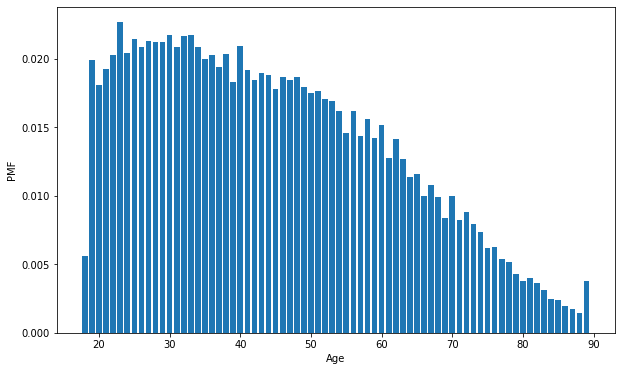

In [5]:
plt.figure(figsize=(10,6))

# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

In [6]:
from empiricaldist import Cdf

#Make a CDF

#In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER
#than 30.

#The GSS dataset has been preloaded for you into a DataFrame called gss.

#As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you
#can access it outside of DataCamp via the empiricaldist library.

# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))

0.2539137136526389


In [7]:
#Question

#What fraction of the respondents in the GSS dataset are OLDER than 30?

#Possible Answers

#Approximately 75%*

#Approximately 65%

#Approximately 45%

#Approximately 25%

In [8]:
cdf_income = Cdf.from_seq(gss['realinc'])

#Compute IQR

#Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a
#measure of variability that is robust in the presence of errors or extreme values.

#In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc'
#column, and the CDF of income has already been computed and stored in cdf_income.

# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


In [9]:
#Question

#What is the interquartile range (IQR) of income in the GSS datset?

#Possible Answers

#Approximately 29676*

#Approximately 26015

#Approximately 34702

#Approximately 30655

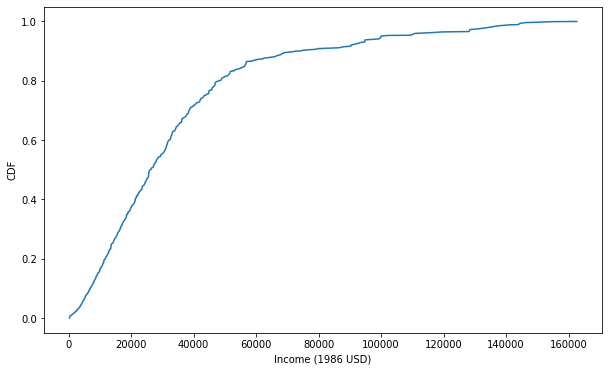

In [10]:
plt.figure(figsize=(10,6))

#Plot a CDF

#The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very
#high incomes.

#In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a
#sense of the shape of this distribution by plotting the CDF.

# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

In [11]:
#Distribution of education

#Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into
#a DataFrame called gss. The variable educ represents the respondent's years of education.

#What fraction of respondents report that they have 12 years of education or fewer?

cdf = Cdf.from_seq(gss['educ'])
cdf(12)

array(0.53226117)

In [12]:
#Possible Answers

#Approximately 22%

#Approximately 31%

#Approximately 47%

#Approximately 53%*

In [13]:
#Extract education levels

#Let's create Boolean Series to identify respondents with different levels of education.

#In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A
#respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16
#years has probably completed a bachelor's degree (four years of college).

# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


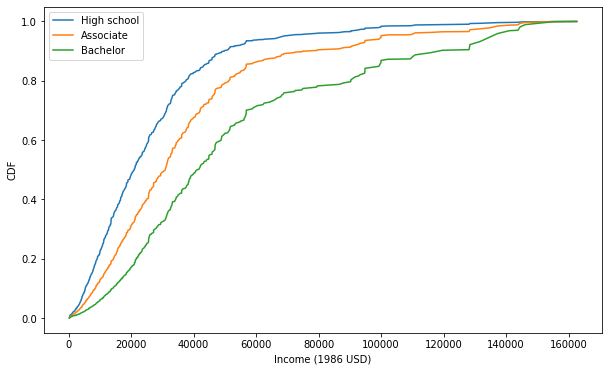

In [14]:
plt.figure(figsize=(10,6))

#Plot income CDFs

#Let's now see what the distribution of income looks like for people with different education levels. You can do this by
#plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

#Cdf(income[pre95]).plot(label='Before 1995')
#Cdf(income[~pre95]).plot(label='After 1995')

#You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different
#education levels: high, assc, and bach.

income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [15]:
import numpy as np

#Distribution of income

#In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes
#fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and
#standard deviation of the log of incomes using NumPy's np.log10() function.

#Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


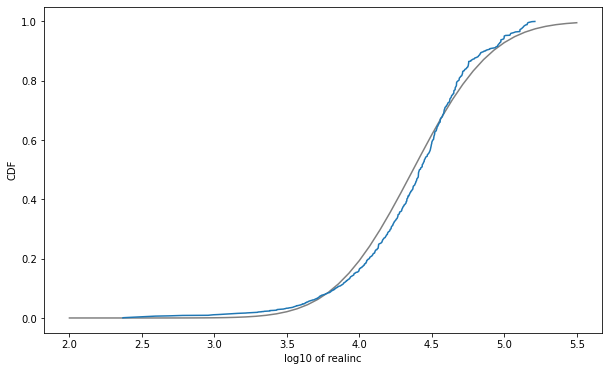

In [16]:
plt.figure(figsize=(10,6))

#Comparing CDFs

#To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the
#logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the
#previous exercise are available for use:

# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

#dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which
#evaluates the normal cumulative distribution function.

#Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates
#the normal cumulative distribution function.

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

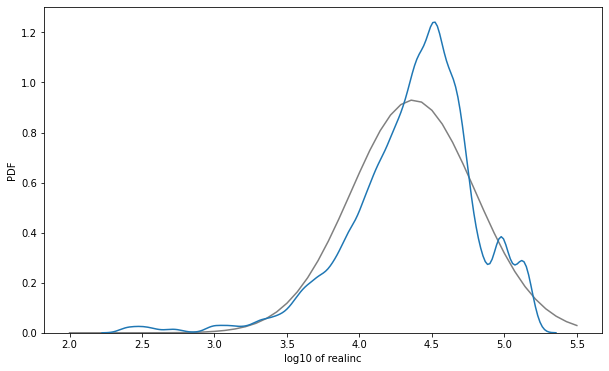

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))

#Comparing PDFs

#In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison
#using a PDF and KDE. That's what you'll do in this exercise!

#As before, the norm object dist is available in your workspace:

from scipy.stats import norm
dist = norm(mean, std)

#Just as all norm objects have a .cdf() method, they also have a .pdf() method.

#To create a KDE plot, you can use Seaborn's kdeplot() function. To learn more about this function and Seaborn, you can
#check out DataCamp's Data Visualization with Seaborn course. Here, Seaborn has been imported for you as sns.

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = norm(mean, std).pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()